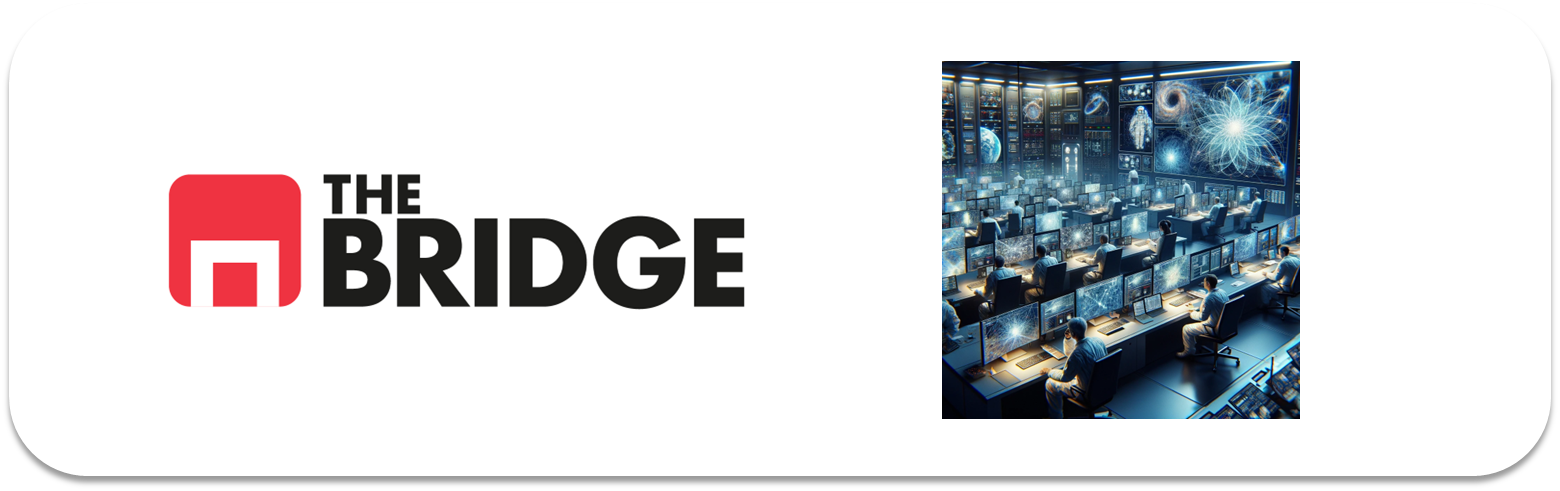

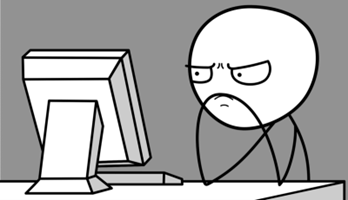

Para ejercitarte y afianzar lo aprendido sobre **Transfer Learning y Fine-tuning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

## Apple 360

En este conjunto de ejercicios vas a montar un clasificador de manzanas mediante un dataset de imágenes. El dataset se compone de 13 tipos diferentes con aproximadamente unas 200 imágenes por cada tipo. Tendrás que montar un modelo de deep learning que utilice **transfer learning**. Se sugiere empezar con una red ResNet50 con imagenet.

El dataset original proviene del [concurso de Kaggle Fruits 360](https://www.kaggle.com/moltean/fruits), pero adaptado para la clasificación de una menor cantidad de casos (sólo las manzanas).


### Ejercicio 1

Crea los juegos de X,y para train y test a partir de los datos teninendo en cuenta su distribución, para ello tendrás que explorar las estructura. Crea un juego Train,test para resolución 32x32 y un juego de test adicional para 224x224. Es decir tendras que tener un X_train, X_test para 32x32 y un X_test adicional a 224x224

In [22]:
import os
import cv2
import numpy as np

def load_images_from_folder(base_folder, categories):
    images = []
    labels = []
    filenames = []

    for label, category in enumerate(categories):  # Asigna un número de clase a cada categoría
        folder_path = os.path.join(base_folder, category)
        if os.path.isdir(folder_path):  # Verifica que sea un directorio válido
            for filename in os.listdir(folder_path):
                filepath = os.path.join(folder_path, filename)
                if os.path.isfile(filepath):  # Asegura que sea un archivo y no otra carpeta
                    img = cv2.imread(filepath)
                    if img is not None:
                        img = cv2.resize(img, (224, 224))  # Redimensionar a 32x32 píxeles
                        images.append(img)
                        labels.append(label)  # Usa el índice de la categoría como clase
                        filenames.append(filename)

    return np.array(images), np.array(labels), filenames

# Directorios base
data_dir_train = r"data\apples\Train"
data_dir_test = r"data\apples\Test"

# Listado de subdirectorios/clases
train_dirs = ["Braebum", "CrimsonSnow", "Golden1", "Golden2", "Golden3",
              "GrannySmith", "PinkLady", "Red1", "Red2", "Red3", "RedDelicious",
              "RedYellow1", "RedYellow2"]
test_dirs = ["Braebum", "CrimsonSnow", "Golden1", "Golden2", "Golden3",
             "GrannySmith", "PinkLady", "Red1", "Red2", "Red3", "RedDelicious",
             "RedYellow1", "RedYellow2"]

# Cargar imágenes de entrenamiento y prueba
X_train, y_train, train_filenames = load_images_from_folder(data_dir_train, train_dirs)
X_test, y_test, test_filenames = load_images_from_folder(data_dir_test, test_dirs)




In [23]:
# Verificar dimensiones de salida
print(f"Total imágenes de entrenamiento: {len(X_train)}")
print(f"Total imágenes de prueba: {len(X_test)}")
print(f"Total imágenes de prueba: {len(test_images_224)}")

Total imágenes de entrenamiento: 5912
Total imágenes de prueba: 1970
Total imágenes de prueba: 1970


**NOTA:** A partir de aquí emplea siempre el X_train, X_test de 32x32 salvo en el ejercicio que se te diga lo contrario.

### Ejercicio 2

Haz una visualización de algunos de los datos. Crea una función que te ayude con ello.

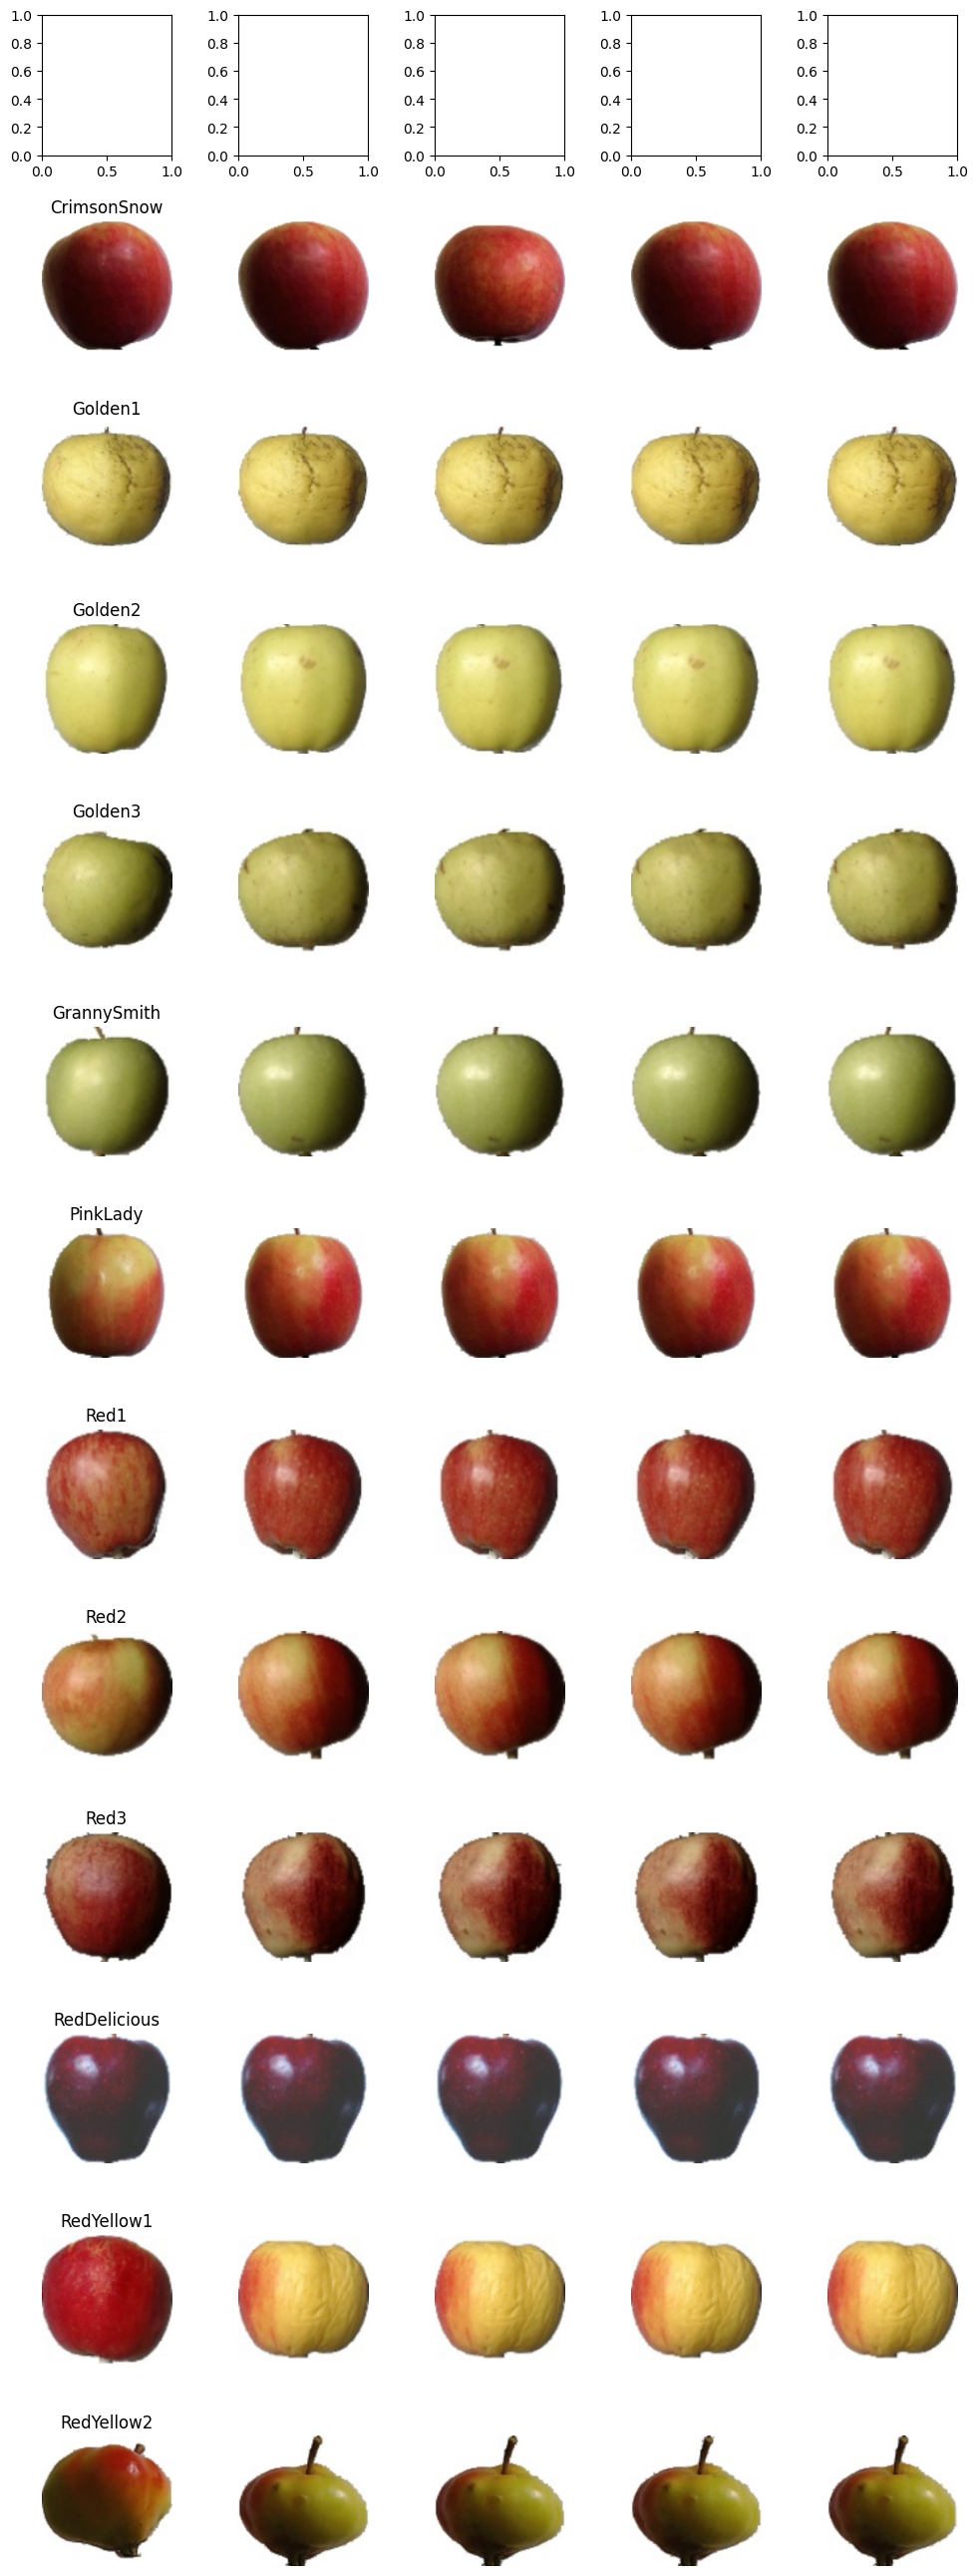

In [31]:
def visualize_dataset(images, labels, class_names, num_samples=5):
    """
    Visualiza una muestra de imágenes de cada clase en el dataset.

    :param images: Array de imágenes cargadas
    :param labels: Array de etiquetas correspondientes
    :param class_names: Lista de nombres de las clases en orden
    :param num_samples: Número de muestras por clase a mostrar
    """
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_classes, num_samples, figsize=(num_samples * 2, num_classes * 2))

    for class_idx in range(num_classes):
        class_images = images[labels == class_idx]  # Filtrar imágenes por clase
        for j in range(min(num_samples, len(class_images))):
            ax = axes[class_idx, j] if num_classes > 1 else axes[j]
            ax.imshow(cv2.cvtColor(class_images[j], cv2.COLOR_BGR2RGB))
            ax.axis('off')
            if j == 0:
                ax.set_title(class_names[class_idx], fontsize=12)

    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar los datos de entrenamiento
visualize_dataset(X_train, y_train, train_dirs, num_samples=5)


### Ejercicio 3

Completa el miniEDA habitual con imágenes y escoge una métrica para el modelo.

### Ejercicio 4 

Termina de transformar los datos si crees que es conveniente y aunque el entrenamiento de modelos de keras ya tiene un shuffling interno, haz un "barajado" del X_train (del X_test no es necesario) para facilitar la convergencia inicial del modelo. Utiliza la función shuffle de sklearn y asigna la salida a un X_train distinto (es decir no machaques el inicial)

In [32]:
from sklearn.utils import shuffle
X_train_shuffled = shuffle(X_train,random_state=42)

### Ejercicio 5

Sklearn permite trabajar con etiquetas textuales pero keras no. Transforma las etiquetas a numéricas, creando dos diccionarios uno que permita traducir de etiqueta a clase numérica y otro que permita la transformación inversa.

In [33]:
y_train

array([ 1,  1,  1, ..., 12, 12, 12])

### Ejercicio 6: Zero Shot Learning

Descar el modelo ResNet50 preparado ya para poder usarlo directamente a la Zero Shot Learning. Pruébalo contra el test (aquí no valen nuestras categorías serán las que proporcione ResNet ojo). Prueba una selección aleatoria de imágenes del test y compara las etiquetas de ResNet con la que tiene. ¿Nos sirve este clasificador así tal cual?

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input


'''
imagenet es un corpus de imagenes con el que se ha clasificado el ResNet50V2
http://www.image-net.org/

Cargamos toda la red ya entrenada, y la usaremos para predecir
include_top=True --> Para que incluya la fully connected layer.
include_top=False --> Desarrollamos la fully connected layer
ojo el input shape que sea el de las imagenes que introduciremos. Esta limitado a imagenes de tamaño 224x224
classifier_activation se usa si include_top=True
'''

base_model = ResNet50V2(input_shape=(224, 224,3),
                        include_top=True, # Como vamos a emplearla directamente, incluimos también la parte de capas densas que hacen la predicción en este caso clasificación de imagenes 
                        weights="imagenet", # Se carga con los pesos entrenados para el dataset de imagenet
                        classifier_activation="softmax")

## Transfer Learning

### Ejercicio 7:

Carga la ResNet50 sin cabezas, crea un modelo con el anterior y una cabeza con dos capas densas, una oculta de 300 unidades (con activación "relu") y otra de salida con las unidades que crees necesarias y activación la que consideres. Congela las capas del modelo base (la ResNet50). Define también los hiperparámetros necesarios para compilar y compila el modelo y muestra un summary del mismo.

### Ejercicio 8

Entrena el modelo con nuestros datos de train y muestra la evolución del entrenamiento. Emplea un callback de Earlystopping con patience a 5. Termina de escoger el batch_size y el número de épocas.

### Ejercicio 9

Evalua el modelo contra test y haz un pequeño análisis de las diferencias. Haz un clasification report y muestra la matriz de confusion. Haz un pequeño análisis de errores.

## Fine Tuning

### Ejercicio 10

Vuelve a descargar el modelo ResNet50 pero sin pesos entrenados, ni cabeza, crea el mismo modelo personalizado que en el ejercicio 7, compila y muestra el summary.

### Ejercicio 11
Entrena con batch_size a 64 y 60 épocas, con un EarlyStopping de patience a 10 (ahora el entrenamiento es sensiblemente más largo, así que tómate un descanso). Muestra la evolución y da una posible justificación a emplear tantas épocas de partida.

### Ejercicio 12

Muestra la evaluación contra el test, el informe de clasificación  y la matriz de confusión. Compara los resultados con los del ejercicio 9.